<a href="https://colab.research.google.com/github/skhabiri/DS-Unit-4-Sprint-1-NLP/blob/main/module1-text-data/LS_DS17_411_Text_Data_Lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 4, Sprint 1, Module 1*

---
<h1 id="moduleTitle"> Natural Language Processing Introduction (Prepare)</h1>

"Natural" meaning - not computer languages but spoken/written human languages. The hard thing about NLP is that human languages are far less structured or consistent than computer languages. This is perhaps the largest source of difficulty when trying to get computers to "understand" human languages. How do you get a machine to understand sarcasm, and irony, and synonyms, connotation, denotation, nuance, and tone of voice --all without it having lived a lifetime of experience for context? If you think about it, our human brains have been exposed to quite a lot of training data to help us interpret languages, and even then we misunderstand each other pretty frequently. 
    

<h2 id='moduleObjectives'>Learning Objectives</h2>

By the end of end of this module, a student should be able to:
* <a href="#p1">Objective 1</a>: Tokenize text
* <a href="#p1">Objective 2</a>: Remove stop words from text
* <a href="#p3">Objective 3</a>: Perform stemming and lemmatization on tokens

## Conda Environments

You will be completing each module this sprint on your machine. We will be using conda environments to manage the packages and their dependencies for this sprint's content. In a classroom setting, instructors typically abstract away environment for you. However, environment management is an important professional data science skill. We showed you how to manage environments using pipvirtual env during Unit 3, but in this sprint, we will introduce an environment management tool common in the data science community: 

> __conda__: Package, dependency and environment management for any language—Python, R, Ruby, Lua, Scala, Java, JavaScript, C/ C++, FORTRAN, and more.

The easiest way to install conda on your machine is via the [Anaconda Distribution](https://www.anaconda.com/distribution/) of Python & R. Once you have conda installed, read ["A Guide to Conda Environments"](https://towardsdatascience.com/a-guide-to-conda-environments-bc6180fc533). This article will provide an introduce into some of the conda basics. If you need some additional help getting started, the official ["Setting started with conda"](https://conda.io/projects/conda/en/latest/user-guide/getting-started.html) guide will point you in the right direction. 

:snake: 

To get the sprint environment setup: 

1. Open your command line tool (Terminal for MacOS, Anaconda Prompt for Windows)
2. Navigate to the folder with this sprint's content. There should be a `requirements.txt`
3. Run `conda create -n U4-S1-NLP python==3.7` => You can also rename the environment if you would like. Once the command completes, your conda environment should be ready.
4. Now, we are going to add in the require python packages for this sprint. You will need to 'activate' the conda environment: `source activate U4-S1-NLP` on Terminal or `conda activate U4-S1-NLP` on Anaconda Prompt. Once your environment is activate, run `pip install -r requirements.txt` which will install the required packages into your environment.
5. We are going to also add an Ipython Kernel reference to your conda environment, so we can use it from JupyterLab. 
6. Next run `python -m ipykernel install --user --name U4-S1-NLP --display-name "U4-S1-NLP (Python3)"` => This will add a json object to an ipython file, so JupterLab will know that it can use this isolated instance of Python. :) 
7. Last step, we need to install the models for Spacy. Run these commands `python -m spacy download en_core_web_md` and `python -m spacy download en_core_web_lg`
8. Deactivate your conda environment and launch JupyterLab. You should know see "U4-S1-NLP (Python3)" in the list of available kernels on launch screen. 

# Tokenze Text (Learn)
<a id="p1"></a>

## Overview

> **token**: an instance of a sequence of characters in some particular document that are grouped together as a useful semantic unit for processing

> [_*Introduction to Information Retrival*_](https://nlp.stanford.edu/IR-book/)


### The attributes of good tokens

* Should be stored in an iterable data structure
  - Allows analysis of the "semantic unit"
* Should be all the same case
  - Reduces the complexity of our data
* Should be free of non-alphanumeric characters (ie punctuation, whitespace)
  - Removes information that is probably not relevant to the analysis

Let's pretend we are trying analyze the random sequence here. Question: what is the most common character in this sequence?

## Tokenization and Lammetization:
1. Use python's regular expressions and split to tokenize the text (tokenize function
2. Use Spacy.Tokenizer.pipe() to tokenize the text with .text attribute
3. Can use Spacy.Tokenizer's .is_stop, .is_punct methods to filter out some tokens
4. Can use union() to expand the stop list
5. Use iterate over spacy.Doc to get the token and then use .lemma_attribute to lemmatize the words 
6. Additionally can use Counter(), rank() to remove less frequent words as a statistical trimming
6. Using PorterStemmer.stem() to chop off the words ending with limmited usage


In [87]:
# The next two lines are for colab not local install+jupyter
!pip install squarify 
!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_lg-2.3.1/en_core_web_lg-2.3.1.tar.gz


     |████████████████████████████████| 782.7MB 20kB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.3.1-cp36-none-any.whl size=782936125 sha256=6ebb58963e131fd184676672e759e8cd739d34d97e77cf23df4686d7589c22a8
  Stored in directory: /root/.cache/pip/wheels/ce/4d/1b/bc6cabb6df139c5f0318927be3ae9e51363fb44d6ea328d3f4
Successfully built en-core-web-lg


In [2]:
random_seq = "AABAAFBBBBCGCDDEEEFCFFDFFAFFZFGGGGHEAFJAAZBBFCZ"

A useful unit of analysis for us is going to be a letter or character

In [3]:
tokens = list(random_seq)
print(tokens)

['A', 'A', 'B', 'A', 'A', 'F', 'B', 'B', 'B', 'B', 'C', 'G', 'C', 'D', 'D', 'E', 'E', 'E', 'F', 'C', 'F', 'F', 'D', 'F', 'F', 'A', 'F', 'F', 'Z', 'F', 'G', 'G', 'G', 'G', 'H', 'E', 'A', 'F', 'J', 'A', 'A', 'Z', 'B', 'B', 'F', 'C', 'Z']


Our tokens are already "good": in an iterable datastructure, all the same case, and free of noise characters (punctuation, whitespace), so we can jump straight into analysis.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


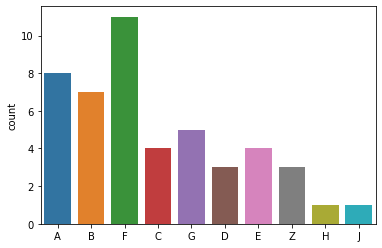

In [4]:
import seaborn as sns

sns.countplot(tokens);

The most common character in our sequence is  "F". We can't just glance at the the sequence to know which character is the most common. We (humans) struggle to subitize complex data (like random text sequences).

> __Subitize__ is the ability to tell the number of objects in a set, quickly, without counting.  

We need to chunk the data into countable pieces "tokens" for us to analyze them. This inability subitize text data is the motivation for our discussion today.

### Tokenizing with Pure Python

In [5]:
sample = "Friends, Romans, countrymen, lend me your ears;"

##### Iterable Tokens

A string object in Python is already iterable. However, the item you iterate over is a character not a token:

```
from time import sleep
for num, character in enumerate(sample):
    sleep(.5)
    print(f"Char {num} - {character}", end="\r")
```

If we instead care about the words in our sample (our semantic unit), we can use the string method `.split()` to separate the whitespace and create iterable units. :)

In [6]:
sample.split(" ")

['Friends,', 'Romans,', 'countrymen,', 'lend', 'me', 'your', 'ears;']

##### Case Normalization
A common data cleaning data cleaning task with token is to standardize or normalize the case. Normalizing case reduces the chance that you have duplicate records for things which have practically the same semantic meaning. You can use either the `.lower()` or `.upper()` string methods to normalize case.

Consider the following example: 

In [7]:
# zipfile has multiple files and directory. We filter the files to get the desired file
import requests, zipfile
from urllib.request import urlopen
from io import BytesIO
import pandas as pd

zip_file_url = 'https://github.com/skhabiri/DS-Unit-4-Sprint-1-NLP/blob/main/module1-text-data/data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv.zip?raw=true'
remote_zip_file = urlopen(zip_file_url)
zipinmemory = BytesIO(remote_zip_file.read())
zip_file = zipfile.ZipFile(zipinmemory)
zip_file.namelist()

['Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv',
 '__MACOSX/',
 '__MACOSX/._Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv']

In [8]:
df = pd.read_csv(zip_file.open(zip_file.namelist()[0]))
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2017-03-02T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-08-31T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-12-06T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-03-28T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2017-04-22T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [9]:
# Notice anything odd here? 
df['brand'].value_counts()

Amazon          16153
Amazonbasics    12169
AmazonBasics       10
Name: brand, dtype: int64

In [10]:
# Much cleaner
df['brand'] = df['brand'].apply(lambda x: x.lower())
df['brand'].value_counts()

amazon          16153
amazonbasics    12179
Name: brand, dtype: int64

##### Keep Only Alphanumeric Characters
Yes, we only want letters and numbers. Everything else is probably noise: punctuation, whitespace, and other notation. This one is little bit more complicated than our previous example. Here we will have to import the base package `re` (regular expressions). 

The only regex expression pattern you need for this is `'[^a-zA-Z 0-9]'` which keeps lower case letters, upper case letters, spaces, and numbers.

In [11]:
sample = sample+" 911"
print(sample)

Friends, Romans, countrymen, lend me your ears; 911


In [12]:
import re

re.sub('[^a-zA-Z 0-9]', '', sample)

'Friends Romans countrymen lend me your ears 911'

#### Two Minute Challenge 
- Complete the function `tokenize` below
- Combine the methods which we discussed above to clean text before we analyze it
- You can put the methods in any order you want

In [13]:
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub('[^a-zA-Z 0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [14]:
tokenize(sample)

['friends', 'romans', 'countrymen', 'lend', 'me', 'your', 'ears', '911']

## Follow Along

Our inability to analyze text data becomes quickly amplified in a business context. Consider the following: 

A business which sells widgets also collects customer reviews of those widgets. When the business first started out, they had a human read the reviews to look for patterns. Now, the business sells thousands of widgets a month. The human readers can't keep up with the pace of reviews to synthesize an accurate analysis. They need some science to help them analyze their data.

Now, let's pretend that business is Amazon, and the widgets are Amazon products such as the Alexa, Echo, or other AmazonBasics products. Let's analyze their reviews with some counts. This dataset is available on [Kaggle](https://www.kaggle.com/datafiniti/consumer-reviews-of-amazon-products/).

In [15]:
"""
Import Statements
"""

# Base
from collections import Counter
import re
 
import pandas as pd


# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
df.head(2)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2017-03-02T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-08-31T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."


In [17]:
df.shape

(28332, 24)

In [18]:
# How can we count the raw text?
df['reviews.text'].value_counts(normalize=True)[:50]

good                0.002118
great               0.001729
Good                0.001482
Great               0.001341
ok                  0.001165
Great price         0.001059
great price         0.000988
Excellent           0.000988
Great value         0.000953
good price          0.000812
great value         0.000777
Great price!        0.000635
good value          0.000600
good deal           0.000565
Great value.        0.000565
Good deal           0.000529
Great deal          0.000529
Great product       0.000529
OK                  0.000529
As expected         0.000529
Good value          0.000494
Good batteries      0.000494
So far so good      0.000459
Great batteries.    0.000459
great deal          0.000459
Great value!        0.000459
Good price          0.000459
Good buy            0.000424
Work great          0.000424
Great deal!         0.000388
Great buy           0.000388
good batteries      0.000388
Great batteries     0.000388
as expected         0.000388
As described  

In [19]:
# tokenize function do something like re.sub('[^a-z A-z]', '', text)
# tokenized rows should be iterable
df['tokens'] = df['reviews.text'].apply(tokenize)

In [20]:
df['tokens'].head()

0    [i, order, 3, of, them, and, one, of, the, ite...
1    [bulk, is, always, the, less, expensive, way, ...
2    [well, they, are, not, duracell, but, for, the...
3    [seem, to, work, as, well, as, name, brand, ba...
4    [these, batteries, are, very, long, lasting, t...
Name: tokens, dtype: object

In [21]:
df[['reviews.text', 'tokens']][:10]

,reviews.text,tokens
0,I order 3 of them and one of the item is bad q...,"[i, order, 3, of, them, and, one, of, the, ite..."
1,Bulk is always the less expensive way to go fo...,"[bulk, is, always, the, less, expensive, way, ..."
2,Well they are not Duracell but for the price i...,"[well, they, are, not, duracell, but, for, the..."
3,Seem to work as well as name brand batteries a...,"[seem, to, work, as, well, as, name, brand, ba..."
4,These batteries are very long lasting the pric...,"[these, batteries, are, very, long, lasting, t..."
5,Bought a lot of batteries for Christmas and th...,"[bought, a, lot, of, batteries, for, christmas..."
6,ive not had any problame with these batteries ...,"[ive, not, had, any, problame, with, these, ba..."
7,Well if you are looking for cheap non-recharge...,"[well, if, you, are, looking, for, cheap, nonr..."
8,These do not hold the amount of high power jui...,"[these, do, not, hold, the, amount, of, high, ..."
9,AmazonBasics AA AAA batteries have done well b...,"[amazonbasics, aa, aaa, batteries, have, done,..."


In [22]:
df['primaryCategories'].value_counts()

Electronics                    13995
Health & Beauty                12071
Toys & Games,Electronics        1676
Office Supplies,Electronics      386
Electronics,Media                185
Office Supplies                    9
Animals & Pet Supplies             6
Electronics,Furniture              2
Home & Garden                      2
Name: primaryCategories, dtype: int64

In [23]:
# We work only with rows that have Categories == Electronics 
df = df[df['primaryCategories'] == 'Electronics'].copy()

In [24]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,tokens
8343,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,AmazonBasics,YBB12400R2,2017-11-12T00:00:00.000Z,2019-03-25T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.ebay.com/itm/Amazonbasics-Nylon-Cd...,Great case to keep everything in its place! My...,Excellent product,qs341_5,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...,"[great, case, to, keep, everything, in, its, p..."
8344,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,AmazonBasics,YBB12400R2,2014-06-14T05:00:00Z,2014-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,http://www.amazon.co.uk/gp/product-reviews/B00...,After discarding and getting rid of broken cd ...,It was a much needed storage,Diablita,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...,"[after, discarding, and, getting, rid, of, bro..."
8345,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,AmazonBasics,YBB12400R2,2019-02-15T00:00:00.000Z,2019-03-25T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.ebay.com/itm/Amazonbasics-Nylon-Cd...,"A few dollars more, but I am boycotting amazon",it was worth it,coldbloodblazing,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...,"[a, few, dollars, more, but, i, am, boycotting..."
8346,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,AmazonBasics,YBB12400R2,2014-06-19T05:00:00Z,2014-08-28T00:00:00Z,NaN,NaN,NaN,NaN,2,http://www.amazon.co.uk/gp/product-reviews/B00...,My initial impression of this was very good. T...,"Not well designed, very tight when full. Becom...",Snrub,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...,"[my, initial, impression, of, this, was, very,..."
8347,AVpfl8cLLJeJML43AE3S,2016-04-08T18:16:28Z,2019-04-25T08:51:22Z,Amazon Echo ‚Äì White,"B01E6AO69U,B00L9EPT8O",amazon,"Stereos,Remote Controls,Audio Docks & Mini Spe...",Electronics,https://i.ebayimg.com/images/g/NWEAAOSwDehbdx6...,"amazonechowhite/b00l9ept8o,amazonechowhite/b01...",Amazon,B01E6AO69U,2018-10-15T00:00:00.000Z,"2019-04-24T00:00:00Z,2019-04-25T00:00:00Z",True,NaN,NaN,NaN,5,https://www.newegg.com/Product/Product.aspx?It...,Pros: Standard Echo. Cons: Older generation Ec...,Arrived as described.,Anonymous,https://www.newegg.com/Product/Product.aspx?It...,"[pros, standard, echo, cons, older, generation..."


#### Analyzing Tokens

In [25]:
# Object from Base Python
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

""" Update the dictionary of word_counts based on 
elements of each row's iterable list
"""
df['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('the', 17723),
 ('and', 14005),
 ('it', 13113),
 ('to', 12750),
 ('for', 12224),
 ('i', 12037),
 ('a', 10494),
 ('is', 8508),
 ('this', 8109),
 ('my', 7914)]

Let's create a fuction which takes a corpus of document and returns a dataframe of word counts for us to analyze.

In [26]:
def count(docs):
        """
        docs: if it's tokenized pandas series, then we count number of tokens
        in the entire series
        appears_in only count once any word that appears in each iteration.
        word_counts counts repeated instances of a word in each iteration as well
        """
        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])
        
        # first: ranks assigned in order they appear in the array
        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [27]:
# Use the Function
wc = count(df['tokens'])

In [28]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
40,the,7809,17723,1.0,0.041211,0.041211,0.557985
49,and,8543,14005,2.0,0.032565,0.073776,0.610432
15,it,7490,13113,3.0,0.030491,0.104267,0.535191
4,to,7137,12750,4.0,0.029647,0.133914,0.509968
92,for,7990,12224,5.0,0.028424,0.162339,0.570918


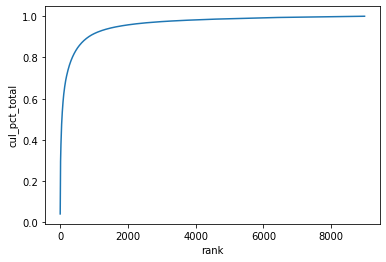

In [29]:
import seaborn as sns

# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [30]:
# 61% of the data is in the first 100 most frequent words
wc[wc['rank'] <= 100]['cul_pct_total'].max()

0.6130405666212466

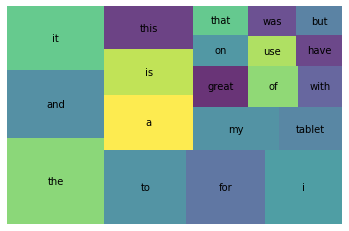

In [31]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

### Processing Raw Text with Spacy

Spacy's datamodel for documents is unique among NLP libraries. Instead of storing the documents components in various data structures, Spacy indexes components and simply stores the lookup information. 

This is often why Spacy is considered to be more production grade than library like NLTK.

In [32]:
# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")


# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [33]:
# Print out list of tokens
sample = "Friends, Romans, countrymen, lend me your ears;"
[token.text for token in tokenizer(sample)]

['Friends,', 'Romans,', 'countrymen,', 'lend', 'me', 'your', 'ears;']

In [34]:
# Tokenizer Pipe to save memory by limiting batch size

tokens = []

""" Here 'doc' referes to each row of the pandas series """
for doc in tokenizer.pipe(df['reviews.text'], batch_size=500):
    # doc_tokens is one tokenized row of pd.Series
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

df['tokens'] = tokens

In [35]:
df['tokens'].head()

8343    [Great, case, to, keep, everything, in, its, p...
8344    [After, discarding, and, getting, rid, of, bro...
8345    [A, few, dollars, more,, but, I, am, boycottin...
8346    [My, initial, impression, of, this, was, very,...
8347    [Pros:, Standard, Echo., Cons:, Older, generat...
Name: tokens, dtype: object

In [36]:
wc = count(df['tokens'])

In [37]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
42,the,7230,15157,1.0,0.035131,0.035131,0.516613
50,and,8438,13734,2.0,0.031832,0.066963,0.602930
3,to,7090,12621,3.0,0.029253,0.096216,0.506610
100,for,7811,11753,4.0,0.027241,0.123457,0.558128
111,I,5846,11554,5.0,0.026780,0.150237,0.417721


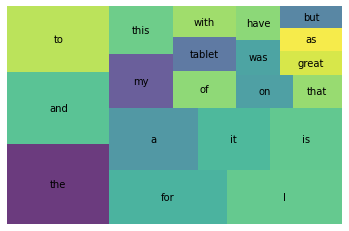

In [38]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Challenge

In the module project, you will apply tokenization to another set of review data and produce visualizations of those tokens. 

In [39]:
# list of columns
list(df)

['id',
 'dateAdded',
 'dateUpdated',
 'name',
 'asins',
 'brand',
 'categories',
 'primaryCategories',
 'imageURLs',
 'keys',
 'manufacturer',
 'manufacturerNumber',
 'reviews.date',
 'reviews.dateSeen',
 'reviews.didPurchase',
 'reviews.doRecommend',
 'reviews.id',
 'reviews.numHelpful',
 'reviews.rating',
 'reviews.sourceURLs',
 'reviews.text',
 'reviews.title',
 'reviews.username',
 'sourceURLs',
 'tokens']

# Stop Words (Learn)
<a id="p2"></a>

## Overview
Section Agenda
- What are they?
- How do we get rid of them using Spacy?
- Visualization
- Libraries of Stop Words
- Extending Stop Words
- Statistical trimming

If the visualizations above, you began to notice a pattern. Most of the words don't really add much to our understanding of product reviews. Words such as "I", "and", "of", etc. have almost no semantic meaning to us. We call these useless words "stop words," because we should 'stop' ourselves from including them in the analysis. 

Most NLP libraries have built in lists of stop words that common english words: conjunctions, articles, adverbs, pronouns, and common verbs. The best practice, however, is to extend/customize these standard english stopwords for your problem's domain. If I am studying political science, I may want to exclude the word "politics" from my analysis; it's so common it does not add to my understanding. 

## Follow Along 

### Default Stop Words
Let's take a look at the standard stop words that came with our Spacy model:

In [40]:
# Spacy's Default Stop Words
list(nlp.Defaults.stop_words)[:10]

['‘ll',
 'here',
 'former',
 'back',
 'most',
 'perhaps',
 'done',
 'anywhere',
 'nine',
 'thus']

In [41]:
tokens = []

""" Update those tokens w/o stopwords"""
for row in tokenizer.pipe(df['reviews.text'], batch_size=500):
    
    row_tokens = []
    
    for token in row:
        if (token.is_stop == False) & (token.is_punct == False):
            # append each token of a row
            row_tokens.append(token.text.lower())

    tokens.append(row_tokens)

df['tokens'] = tokens

In [42]:
df.tokens.head()

8343    [great, case, place!, husband, love, it!!!!, h...
8344    [discarding, getting, rid, broken, cd, cases,,...
8345                 [dollars, more,, boycotting, amazon]
8346    [initial, impression, good., material, nicer, ...
8347    [pros:, standard, echo., cons:, older, generat...
Name: tokens, dtype: object

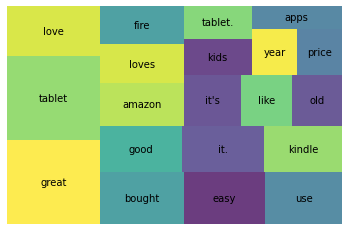

In [43]:
wc = count(df['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()
# words getting more useful and relevant

### Extending Stop Words

In [44]:
print(type(nlp.Defaults.stop_words))

<class 'set'>


In [45]:
# adding common words for this particular topic
STOP_WORDS = nlp.Defaults.stop_words.union(['batteries','I', 'amazon', 'i', 'Amazon', 'it', "it's", 'it.', 'the', 'this',])

In [46]:
list(STOP_WORDS)[:10]

['‘ll',
 'former',
 'done',
 'thus',
 'beforehand',
 'up',
 'once',
 'whatever',
 'side',
 'themselves']

In [47]:
tokens = []

for row in tokenizer.pipe(df['reviews.text'], batch_size=500):
    
    row_tokens = []
    
    for token in row: 
        
      # is_stop works with default spacy stopword set
      #  if (token.is_stop == False) & (token.is_punct == False):
       if token.text.lower() not in STOP_WORDS:
            row_tokens.append(token.text.lower())
   
    tokens.append(row_tokens)
    
df['tokens'] = tokens

In [48]:
wc = count(df['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
1,great,3620,4181,1.0,0.020612,0.020612,0.258664
1511,tablet,3463,4176,2.0,0.020588,0.041200,0.247446
2,love,2234,2465,3.0,0.012152,0.053352,0.159628
1210,bought,2194,2327,4.0,0.011472,0.064824,0.156770
169,easy,2107,2275,5.0,0.011216,0.076040,0.150554


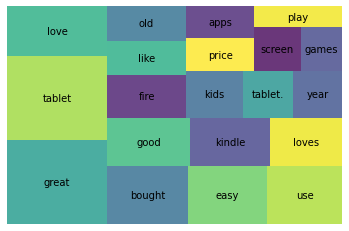

In [49]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [50]:
df['reviews.rating'].value_counts()

5    9371
4    3703
3     551
1     187
2     183
Name: reviews.rating, dtype: int64

### Statistical Trimming

So far, we have talked about stop word in relation to either broad english words or domain specific stop words. Another common approach to stop word removal is via statistical trimming. The basic idea: preserve the words that give the most about of variation in your data. 

Do you remember this graph?

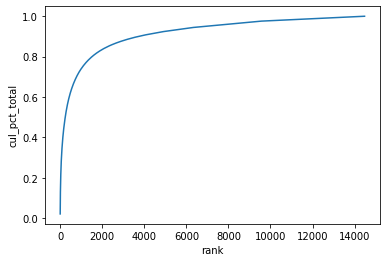

In [51]:
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

This graph tells us that only a *handful* of words represented 80% of words in the overall corpus. We can interpret this in two ways: 
1. The words that appear most frequently may not provide any insight into the mean on the documents since they are so prevalent. 
2. Words that appear infrequency (at the end of the graph) also probably do not add much value, because the are mentioned so rarely. 

Let's take a look at the words at the bottom and the top and make a decision for ourselves:

In [52]:
wc.tail(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
14453,say..............................................,1,1,14454.0,0.000005,0.999906,0.000071
14454,kindlelishous!!!!!!!!!!!!!,1,1,14455.0,0.000005,0.999911,0.000071
14455,"competent,",1,1,14456.0,0.000005,0.999916,0.000071
14456,"3-year-old,",1,1,14457.0,0.000005,0.999921,0.000071
14457,objective,1,1,14458.0,0.000005,0.999926,0.000071
14459,dollars.my,1,1,14459.0,0.000005,0.999931,0.000071
14458,relies,1,1,14460.0,0.000005,0.999936,0.000071
14460,gps.,1,1,14461.0,0.000005,0.999941,0.000071
14461,"readi,g",1,1,14462.0,0.000005,0.999946,0.000071
14462,perfectly..great,1,1,14463.0,0.000005,0.999951,0.000071


In [53]:
wc['appears_in_pct'].describe()

count    14473.000000
mean         0.000945
std          0.005579
min          0.000071
25%          0.000071
50%          0.000143
75%          0.000357
max          0.258664
Name: appears_in_pct, dtype: float64

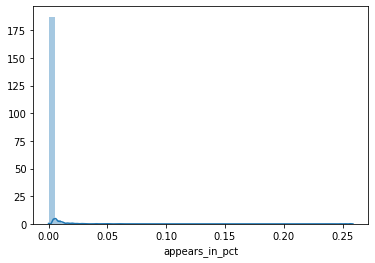

In [54]:
# Frequency of appears in documents
# most of tokens are scattered 
sns.distplot(wc['appears_in_pct']);

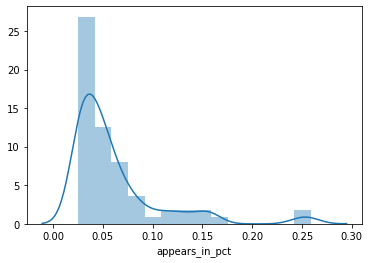

In [55]:
# Tree-Map w/ Words that appear in a least 2.5% of documents. 

wc = wc[wc['appears_in_pct'] >= 0.025]

sns.distplot(wc['appears_in_pct']);

In [56]:
wc.shape

(67, 7)

## Challenge

In the module project, you will apply stop word removal to a new corpus. You will focus on applying dictionary based stop word removal, but as a stretch goal, you should consider applying statistical stopword trimming. 

# Stemming & Lemmatization (Learn)
<a id="p3"></a>

## Overview

You can see from our example above there is still some normalization to do to get a clean analysis. You notice that there many words (*i.e.* 'batteries', 'battery') which share the same root word. We can use either the process of stemming or lemmatization to trim our words down to the 'root' word. 

__Section Agenda__:

- Which is which
- why use one v. other
- show side by side visualizations 
- how to do it in spacy & nltk
- introduce PoS in here as well

## Follow Along

### Stemming

> *a process for removing the commoner morphological and inflexional endings from words in English. Its main use is as part of a term normalisation process that is usually done when setting up Information Retrieval systems.* - [Martin Porter](https://tartarus.org/martin/PorterStemmer/)

Some examples include:
- 'ing'
- 'ed'
- 's'

These rules are by no means comprehensive, but they are somewhere to start. Most stemming is done by well documented algorithms such as Porter, Snowball, and Dawson. Porter and its newer version Snowball are the most popular stemming algorithms today. For more information on various stemming algorithms check out [*"A Comparative Study of Stemming Algorithms"*](https://pdfs.semanticscholar.org/1c0c/0fa35d4ff8a2f925eb955e48d655494bd167.pdf) 


Spacy does not do stemming out of the box, but instead uses a different technique called *lemmatization* which we will discuss in the next section. Let's turn to an antique python package `nltk` for stemming. 

In [57]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

words = ["wolf", "wolves"]

for word in words:
    print(ps.stem(word))

# It simply removes the "es". Not that impressive

wolf
wolv


### Two Minute Challenge

Apply the Porter stemming algorithm to the tokens in the `df` dataframe. Visualize the results in the tree graph we have been using for this session.

In [58]:
df.head(1)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,tokens
8343,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,AmazonBasics,YBB12400R2,2017-11-12T00:00:00.000Z,2019-03-25T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.ebay.com/itm/Amazonbasics-Nylon-Cd...,Great case to keep everything in its place! My...,Excellent product,qs341_5,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...,"[great, case, place!, husband, love, it!!!!, h..."


In [59]:
# Put in a new column `stems`
# split will make the row an iterable list. otherwise it would be one string
# Counter() iteration over a row of string would be character by charcater
df['stems'] = df['reviews.text'].apply(lambda x: ps.stem(x).split())

In [60]:
df['stems'].head(1)

8343    [great, case, to, keep, everything, in, its, p...
Name: stems, dtype: object

In [61]:
print(type(df['stems'][df['stems'].index[0]]))
df['stems'][df['stems'].index[0:2]]


<class 'list'>


8343    [great, case, to, keep, everything, in, its, p...
8344    [after, discarding, and, getting, rid, of, bro...
Name: stems, dtype: object

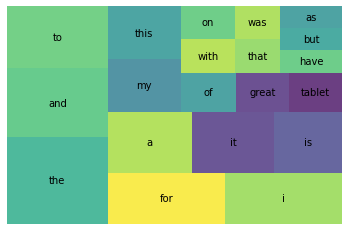

In [62]:
wc = count(df['stems'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [63]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
42,the,7808,17704,1.0,0.041034,0.041034,0.557914
50,and,8529,13958,2.0,0.032352,0.073386,0.609432
4,to,7109,12658,3.0,0.029339,0.102725,0.507967
97,for,7940,12062,4.0,0.027957,0.130683,0.567345
105,i,6055,11994,5.0,0.027800,0.158482,0.432655


### Lemmatization

You notice immediately that results are kinda funky - words just oddly chopped off. The Porter algorithm did exactly what it knows to do: chop off endings. Stemming works well in applications where humans don't have to worry about reading the results. Search engines and more broadly information retrieval algorithms use stemming. Why? Because it's fast. 

Lemmatization on the other hand is more methodical. The goal is to transform a word into its base form called a lemma. Plural nouns with funky spellings get transformed to singular tense. Verbs are all transformed to the transitive. Nice tidy data for a visualization. :) However, this tidy data can come at computational cost. Spacy does a pretty freaking good job of it though. Let's take a look:

* ***Spacy Tokenizer() does not do any symantic change in the document, only tokenize it. However, PorterStemmer() or .lemma_ method lemmatize the tokens***

In [78]:
sent = "This is the start of our NLP adventures. We started here with Spacy. We are starting here with NLP."

nlp = spacy.load("en_core_web_lg")

doc = nlp(sent)
print(type(doc))

# doc is a spacy data type that convert a text string to a iterable object 
doc

<class 'spacy.tokens.doc.Doc'>


This is the start of our NLP adventures. We started here with Spacy. We are starting here with NLP.

In [75]:
dir(doc)[-10:]

['to_disk',
 'to_json',
 'to_utf8_array',
 'user_data',
 'user_hooks',
 'user_span_hooks',
 'user_token_hooks',
 'vector',
 'vector_norm',
 'vocab']

In [80]:
## Lemma Attributes
for token in doc:
    print(token.text, "  ", token.lemma_)

This    this
is    be
the    the
start    start
of    of
our    -PRON-
NLP    NLP
adventures    adventure
.    .
We    -PRON-
started    start
here    here
with    with
Spacy    Spacy
.    .
We    -PRON-
are    be
starting    start
here    here
with    with
NLP    NLP
.    .


In [81]:
# Wrap it all in a function
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [82]:
df['lemmas'] = df['reviews.text'].apply(get_lemmas)

In [83]:
df['lemmas'].head()

8343    [great, case, place, husband, love, hold, lot,...
8344    [discard, get, rid, broken, cd, case, broken, ...
8345                            [dollar, boycott, amazon]
8346    [initial, impression, good, material, nice, sh...
8347    [pro, standard, echo, con, old, generation, ec...
Name: lemmas, dtype: object

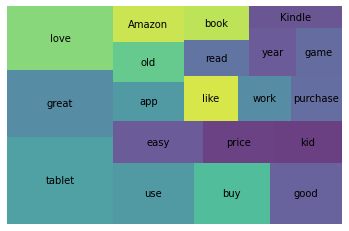

In [84]:
wc = count(df['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Challenge

You should know how to apply lemmatization with Spacy to a corpus of text. 

# Review

In this module project, you've seen us apply Natural Language Processing techniques (tokenization, stopword removal, and lemmatization) to a corpus of Amazon text reviews. We analyzed those reviews using these techniques and discovered that Amazon customers are generally satisfied with the battery life of Amazon products and generally appear satisfied. 

You will apply similar techniques to today's [module project assignment](LS_DS_411_Text_Data_Assignment.ipynb) to analyze coffee shop reviews from yelp. Remember that the techniques of processing the text are just the beginning. There are many ways to slice and dice the data. 

# Sources

* Spacy 101 - https://course.spacy.io
* NLTK Book - https://www.nltk.org/book/
* An Introduction to Information Retrieval - https://nlp.stanford.edu/IR-book/pdf/irbookonlinereading.pdf

## Advanced Resources & Techniques
- Named Entity Recognition (NER)
- Dependcy Trees 
- Generators
- the major libraries (NLTK, Spacy, Gensim)